# Naive Bayes Classifier

# Due Date: 12/3/19

# Name: Mia Rosini

#### Import required Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
sns.set(style="whitegrid")

## Identification of credit card fraud using Naive Bayes classifer. 
The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
See [here](https://www.kaggle.com/mlg-ulb/creditcardfraud) for details of the dataset. We will post process the data to balance both the classes indicating whether the transaction is fraud or not.

#### Load the data

In [2]:
# load dataset
df = pd.read_csv("creditcard.csv")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

#### There are a total of 284807 entries in this dataset with no missing values. First 30 columns are features and the last column indicates whether the transaction is fraud or not

##### Look at some statistics of the data using the `describe` function

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Pie chart showing fraudelent and genuine transactions/

Text(0, 0.5, '')

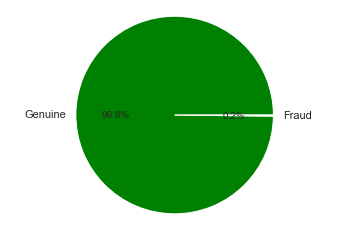

In [5]:
# Make a pie chart showing transaction type
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['green','red'])
plt.axis('equal')
plt.ylabel('')

In [6]:
## Check Fraudelent activity over time

Text(0, 0.5, '# transactions')

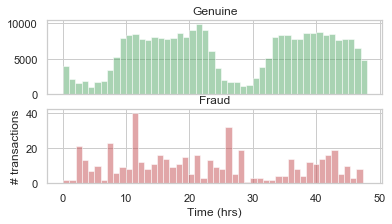

In [7]:
## Check fradulent activity over time (note: total time os 48 hours)
df["Time_Hr"] = df["Time"]/3600 # convert to hours
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [8]:
# Remove 'Time' feature as it is already captured when converting to hours
df = df.drop(['Time'],axis=1)

#### Create a balanced dataset with 50% data for each class

In [9]:
fraud_indices = np.array(df[df.Class == 1].index) #indices corresponding to fraud transaction
genuine_ind = df[df.Class == 0].index #indices corresponding to genuine transaction
total_fraud_transactions = len(df[df.Class == 1]) # total transactions that were fraud
# Indices of genuine transaction
indices_genuine_transaction = np.random.choice(genuine_ind, total_fraud_transactions, replace = False) 
indices_genuine_transaction = np.array(indices_genuine_transaction)
# indicies of data to be considered to get balance the classes.
selected_balanced_indices = np.concatenate([fraud_indices,indices_genuine_transaction]) # indices for balanced data
# Create balanced data frame
balanced_data = df.iloc[selected_balanced_indices,:]

% genuine transactions:  0.5
% fraud transactions:  0.5


Text(0, 0.5, '')

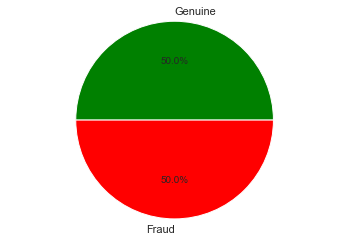

In [10]:
print("% genuine transactions: ",len(balanced_data[balanced_data.Class == 0])/len(balanced_data))
print("% fraud transactions: ",len(balanced_data[balanced_data.Class == 1])/len(balanced_data))

# Make a pie chart showing transaction type
fig, ax = plt.subplots(1, 1)
ax.pie(balanced_data.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['green','red'])
plt.axis('equal')
plt.ylabel('')

#### Create data for training
##### Split the data into training and validation set

In [18]:
# Separate features from labels. Here X are the features in data and y are the labels
feature1 = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
               'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
                'V21','V22','V23','V24','V25','V26','V27','V28','Amount']
X= df[feature1]
y= df.Class

In [19]:
# Convert features and labels to numpy
X = X.to_numpy()
y = y.to_numpy()

In [20]:
# Split the data into trianing and valdiation set
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=.2,random_state=1) # 80 % train and 20% validation

#### Normalize the data so that each feature has zero mean and unit standard deviation. Use `StandardSclaler` function

In [23]:
# Define the scaler
scaler = StandardScaler()

# Standardize the training data
X_train = scaler.fit_transform(X_train)

# Transform the validation data using the above scaler
X_valid = scaler.transform(X_valid)

## Implement Naive Bayes Classifier

Use `sklearn's` Naive Bayes Classifier for classification. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)  for details. Use defulat parameters for the classifier.


In [24]:
# Define the classiifer
clf = GaussianNB()
# Train using the above classifier
clf = clf.fit(X_train,y_train)

In [25]:
# Predict labels for the validation set
predicted_values = clf.predict(X_valid)

#### Check the accuracy of the classifier using `accuracy_score` function. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) for details.

In [26]:
# Print accuracy of Naive Bayes classifier
acc = accuracy_score(y_valid, predicted_values)

print('Accuracy Score: ', acc)

Accuracy Score:  0.9866753274112566


#### Create confusion matrix for this classifier

In [27]:
# DO NOT MODIFY!
## Source https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Automatically created module for IPython interactive environment


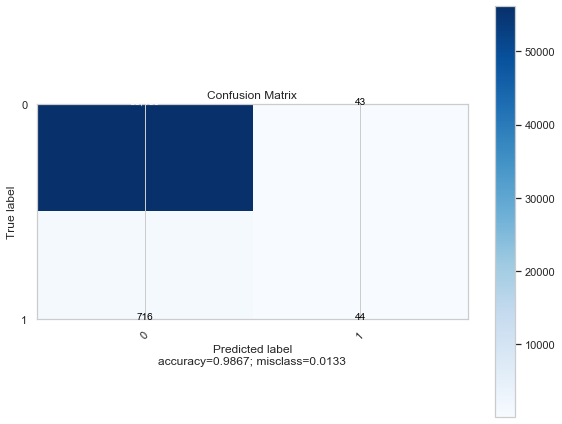

In [28]:
class_names = ['0','1']
plot_confusion_matrix(cm           = confusion_matrix(predicted_values, y_valid), 
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")